In [1]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms



In [2]:
num_workers = 0
batch_size = 20


In [5]:
transform = transforms.Compose([
                                      transforms.Pad(26),
                                      transforms.RandomAffine(degrees=45,
                                                              scale=(0.7, 1.2),
                                                              translate=(0.5, 0.5)
                                                              ),
                                      transforms.ToTensor(),
                                      # transforms.Resize(IMAGE_SHAPE[1:]),   # 227x227
                                      transforms.Normalize((0.1307,),(0.3081,))
    ])

train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)


(20, 1, 80, 80)


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]


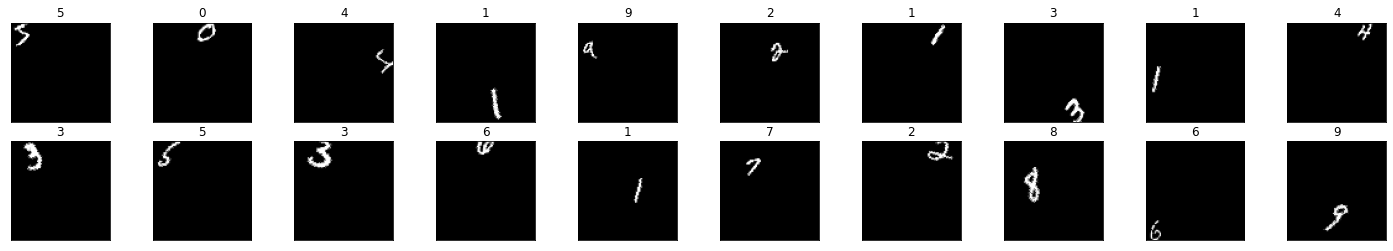

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader) # train_loader의 __iter__ 매서드 호출
images, labels = dataiter.next() # == next(detaiter): batch_size만큼 나옴. images에 관한 값은 'images'에, label 값은 'labels'에 저장됨
# next() 실행시마다 다음 batch_size만큼 가져옴.

images = images.numpy() # images: tensor->numpy, labels는 아직 tensor
print(images.shape) # (20, 1, 28, 28): batch_size인 20개의 1x28x28 크기의 데이터 인풋
fig = plt.figure(figsize=(25,4))   # fig라는 figure를 새로 만들고, 가로 25인치, 세로 4인치로 설정.

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))  # item(): tensor에 저장된 값만 가져오기

In [7]:
transform_2 = transforms.ToTensor()

train_data_2 = datasets.MNIST(root='data', train=True, download=True, transform=transform_2)
test_data_2 = datasets.MNIST(root='data', train=False, download=True, transform=transform_2)

train_loader = torch.utils.data.DataLoader(train_data_2, batch_size=batch_size, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data_2, batch_size=batch_size, num_workers=num_workers)



(20, 1, 28, 28)


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]


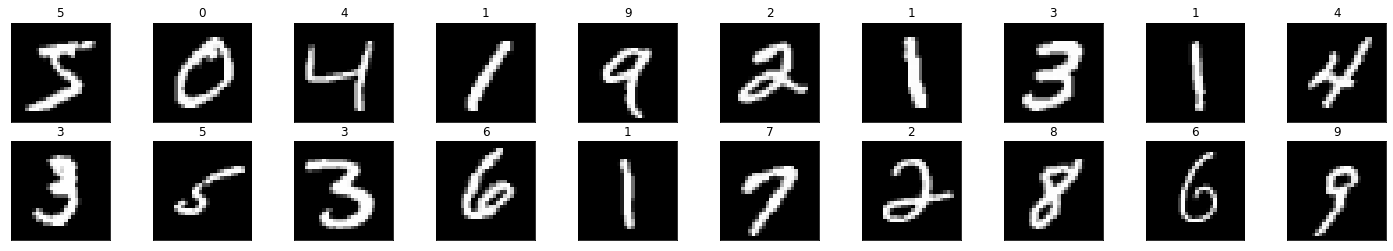

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

dataiter = iter(train_loader) # train_loader의 __iter__ 매서드 호출
images, labels = dataiter.next() # == next(detaiter): batch_size만큼 나옴. images에 관한 값은 'images'에, label 값은 'labels'에 저장됨
# next() 실행시마다 다음 batch_size만큼 가져옴.

images = images.numpy() # images: tensor->numpy, labels는 아직 tensor
print(images.shape) # (20, 1, 28, 28): batch_size인 20개의 1x28x28 크기의 데이터 인풋
fig = plt.figure(figsize=(25,4))   # fig라는 figure를 새로 만들고, 가로 25인치, 세로 4인치로 설정.

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(str(labels[idx].item()))  # item(): tensor에 저장된 값만 가져오기

In [13]:
print(60000%256)
print(10000%256)

96
16
